In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
#veri seti csv dosyası okunur(Heart Disease Health Indicators Dataset)
df =pd.read_csv("heart_disease_health_indicators.csv")

In [3]:
#ilk beş veri gösterilir
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDiseaseorAttack', ylabel='count'>

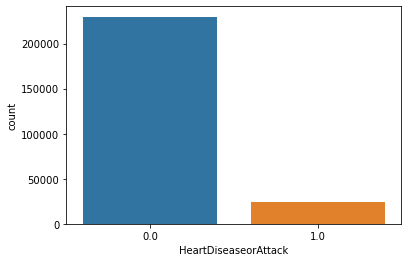

In [4]:
import seaborn as sns
#Uetekit ve giriş özellikleri ayrıldı
sns.countplot(df['HeartDiseaseorAttack'])

In [5]:
#KNN modulu oluşturuldu
knn=KNeighborsClassifier()

#X giriş özelliği, y etiket Özellik otomatik olarak ayrıldı
x=df.drop(columns=['HeartDiseaseorAttack'])#karşılaştırmak için HeartDiseaseorAttack sutunu drop ile çıkarılır
y=df['HeartDiseaseorAttack']

#train ve teste ayırma 
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

#model kurmak(train işlemi yapıldı)
knn.fit(X_train,y_train)

#tahmin oluşturmak (test işlemi yapıldı)
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))

#ROC kriteri hesapalndı
roc_auc_score(y_test,y_pred)# ROC eğrisinin altındaki alanı hesapladığını 
print(roc_auc_score(y_test,y_pred))

accuracy_score(y_test, y_pred)#doğruluk_skoru
print("Dogruluk skoru : ",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     57395
         1.0       0.33      0.11      0.16      6025

    accuracy                           0.89     63420
   macro avg       0.62      0.54      0.55     63420
weighted avg       0.86      0.89      0.87     63420

0.5421666409416582
Dogruluk skoru :  0.8948754336171555
